# Classifiers

In [87]:
# Important packages
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [88]:
df = pd.read_parquet('../Dataframes/df_GBPUSD.parquet.gzip')

In [89]:
# Make date the index
df.index = df["date"]
df.drop(["date"], axis=1, inplace=True)

In [90]:
df.head()

open    high     low   close  delta     slope_3     slope_4  \
date                                                                       
11/2/2000  1.6087  1.6104  1.5879  1.5927    0.0 -220.541232 -148.374761   
14/2/2000  1.5927  1.5971  1.5860  1.5873    0.0  -96.150780 -124.492058   
15/2/2000  1.5873  1.5976  1.5851  1.5960    1.0 -112.616576 -122.682684   
16/2/2000  1.5960  1.6100  1.5946  1.6072    1.0  120.778978   -2.117010   
17/2/2000  1.6072  1.6138  1.6027  1.6083    1.0  112.855285  142.663121   

              slope_5    slope_10    slope_20  ...    roc_13    roc_14  \
date                                           ...                       
11/2/2000  116.575200 -107.755377 -251.128297  ... -3.167558 -3.694522   
14/2/2000 -143.325143 -106.453867 -249.893985  ... -3.213415 -3.495866   
15/2/2000 -147.339957 -117.987932 -248.908844  ... -2.629492 -2.682927   
16/2/2000  -87.880276  -35.636482 -248.159165  ... -0.973506 -1.946190   
17/2/2000   80.169944   27.926070 -250.532839  ... -0.458006 -0.905730   

             roc_15    wcp_15  macd_15_30      cci_15  hi_avg_2  lo_avg_2  \
date                                                                        
11/2/2000 -3.267537  1.614067   -0.008967  -86.662888   1.61380   1.59660   
14/2/2000 -4.021042  1.610986   -0.009996 -110.447349   1.60375   1.58695   
15/2/2000 -2.966926  1.608822   -0.010231  -89.798011   1.59735   1.58555   
16/2/2000 -2.000000  1.608313   -0.009664  -20.623657   1.60380   1.58985   
17/2/2000 -1.879080  1.608309   -0.009055   23.711340   1.61190   1.59865   

           hilo_avg_2  hilo_avg  
date                             
11/2/2000    1.605200   1.59915  
14/2/2000    1.595350   1.59155  
15/2/2000    1.591450   1.59135  
16/2/2000    1.596825   1.60230  
17/2/2000    1.605275   1.60825  

[5 rows x 34 columns]

In [91]:
# Make df['delta'] the expected output
target = df['delta']
df.drop(['delta'], axis = 1, inplace = True)

In [92]:
# Features
feat_labels = ['open', 'high', 'low', 'close', 'wclose', 'so_3', 'so_4', 'so_5',
       'so_8', 'so_9', 'so_10', 'wr_6', 'wr_7', 'wr_8', 'wr_9', 'wr_10',
       'roc_12', 'roc_13', 'roc_14', 'roc_15', 'wcp_15', 'macd_15_30',
       'cci_15', 'hi_avg_2', 'lo_avg_2', 'hilo_avg_2', 'hilo_avg', 'slope_3',
       'slope_4', 'slope_5', 'slope_10', 'slope_20', 'slope_30']

## Random Forest Classifier

#### All features

In [93]:
# Train and Test samples
train_size = int(len(df) * 0.7)
X_train, X_test = df[:train_size], df[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

rf_model = RandomForestClassifier(n_estimators=20, max_depth=2, random_state=0)

rf_model.fit(X_train, y_train)

print("RandomForest accuracy : ",accuracy_score(y_test, rf_model.predict(X_test), normalize = True))

RandomForest accuracy :  0.7819693094629157


#### Features Selection

In [94]:
top_n_features = 10

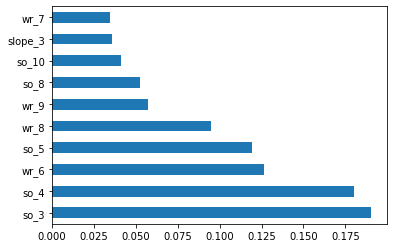

In [95]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(top_n_features).plot(kind='barh')
plt.show()

In [96]:
top_feats = list(feat_importances.nlargest(top_n_features).index)
df2 = df[top_feats]

#### Top N Features

In [97]:
# Train and Test samples
train_size = int(len(df2) * 0.7)
X_train, X_test = df2[:train_size], df2[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

rf_model = RandomForestClassifier(n_estimators=20, max_depth=2, random_state=0)

rf_model.fit(X_train, y_train)

print("RandomForest accuracy : ",accuracy_score(y_test, rf_model.predict(X_test), normalize = True))

RandomForest accuracy :  0.7768542199488491


In [98]:
rf_pred = rf_model.predict(df2)

## Support Vector Machine Classifier (with RBF kernel)

In [99]:
# Train and Test samples
train_size = int(len(df) * 0.7)
X_train, X_test = df[:train_size], df[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

svm_model = SVC(kernel='rbf',random_state=0, gamma='auto')

svm_model.fit(X_train, y_train)

print("RBF-SVC accuracy : ",accuracy_score(y_test, svm_model.predict(X_test), normalize = True))

RBF-SVC accuracy :  0.47634271099744246


In [100]:
svm_pred = svm_model.predict(df)

## XGBoost

#### All Features

In [101]:
# Train and Test samples
train_size = int(len(df) * 0.7)
X_train, X_test = df[:train_size], df[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

boost_model = XGBClassifier()

boost_model.fit(X_train, y_train)

print("XGBoost accuracy : ",accuracy_score(y_test, boost_model.predict(X_test), normalize = True))

XGBoost accuracy :  0.8343989769820972


#### Features Selection

In [102]:
top_n_features = 10

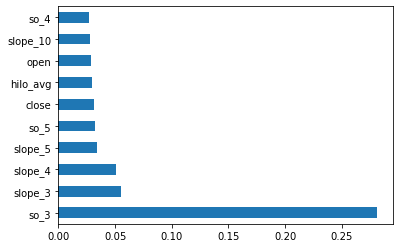

In [103]:
feat_importances = pd.Series(boost_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(top_n_features).plot(kind='barh')
plt.show()

In [104]:
top_feats = list(feat_importances.nlargest(top_n_features).index)
df2 = df[top_feats]

#### Top N Features

In [105]:
# Train and Test samples
train_size = int(len(df2) * 0.7)
X_train, X_test = df2[:train_size], df2[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

boost_model = XGBClassifier()

boost_model.fit(X_train, y_train)

print("XGBoost accuracy : ",accuracy_score(y_test, boost_model.predict(X_test), normalize = True))

XGBoost accuracy :  0.8267263427109974


In [106]:
boost_pred = boost_model.predict(df2)

## Logistic Regression to form meta classifier

In [107]:
dataset = pd.DataFrame({'RandomForest':rf_pred, 
                        #'SVM':svm_pred, 
                        'XGBoost':boost_pred}, 
                       columns=['RandomForest', 'XGBoost'])
dataset.head(n=5)

RandomForest  XGBoost
0           0.0      0.0
1           0.0      0.0
2           0.0      1.0
3           1.0      1.0
4           1.0      1.0

In [108]:
# Train and Test samples
train_size = int(len(dataset) * 0.7)
X_train, X_test = dataset[:train_size], dataset[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

regressor = LogisticRegression(solver='lbfgs')

regressor.fit(X_train, y_train)

print("Logistic Regression accuracy : ",accuracy_score(y_test, regressor.predict(X_test), normalize = True))

Logistic Regression accuracy :  0.8267263427109974


In [109]:
# Note how the accuracy is exactly the same as the XGBoost accuracy, this means that the model is simply spitting out the XGBoost model predictions, as confirmed by the .coef_

In [110]:
regressor.coef_

array([[1.11961561, 9.55768943]])

In [111]:
ohls=df[['open','high','low','close']]

In [112]:
ohls.shape

(5212, 4)

In [113]:
ohls.head()

open    high     low   close
date                                     
11/2/2000  1.6087  1.6104  1.5879  1.5927
14/2/2000  1.5927  1.5971  1.5860  1.5873
15/2/2000  1.5873  1.5976  1.5851  1.5960
16/2/2000  1.5960  1.6100  1.5946  1.6072
17/2/2000  1.6072  1.6138  1.6027  1.6083

In [130]:
alpha_df=ohls[train_size:]

In [131]:
regressor.predict(X_test)

array([1., 0., 1., ..., 1., 1., 0.])

In [132]:
alpha_df['delta']=regressor.predict(X_test)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
alpha_df.head(n=10)

open    high     low   close  delta
date                                            
5/2/2014   1.6325  1.6341  1.6252  1.6309    1.0
6/2/2014   1.6309  1.6349  1.6273  1.6322    0.0
7/2/2014   1.6322  1.6418  1.6302  1.6410    1.0
10/2/2014  1.6410  1.6428  1.6383  1.6403    1.0
11/2/2014  1.6403  1.6487  1.6392  1.6450    1.0
12/2/2014  1.6450  1.6600  1.6426  1.6595    1.0
13/2/2014  1.6595  1.6673  1.6593  1.6659    1.0
14/2/2014  1.6659  1.6756  1.6645  1.6747    1.0
17/2/2014  1.6747  1.6823  1.6696  1.6714    0.0
18/2/2014  1.6714  1.6742  1.6655  1.6684    0.0

In [141]:
alpha_df.iloc[2]['delta']

1.0

In [148]:
capital=100000
cumulative_profit = 0
shares = 0
for i in range(len(alpha_df)):
    curr_delta=alpha_df.iloc[i]['delta']
    
    if i>0 and curr_delta==0 and (shares or alpha_df.iloc[i]['close']<alpha_df.iloc[i-1]['close']): # if shares at hand
        cumulative_profit+= (alpha_df.iloc[i]['close']-alpha_df.iloc[i-1]['close'])*shares
    
    
    if curr_delta == 0:
        capital += shares*alpha_df.iloc[i]['close']
        shares=0
    elif shares==0: # curr_delta is 1 and shares
        shares+=capital//alpha_df.iloc[i]['close']
        capital-=shares*alpha_df.iloc[i]['close']
        
print (capital,cumulative_profit,shares)

81185.55020000019 -124234.39249999968 0


In [152]:
capital=100000
cumulative_profit = 0
unit_per_trade = 1000
for i in range(len(alpha_df)-1):
    curr_delta=alpha_df.iloc[i]['delta']
    if curr_delta == 1:
        cumulative_profit += ((alpha_df.iloc[i+1]['close']-alpha_df.iloc[i+1]['open'])/alpha_df.iloc[i+1]['open'])*unit_per_trade
    #else:
        #cumulative_profit += ((alpha_df.iloc[i+1]['open']-alpha_df.iloc[i+1]['close'])/alpha_df.iloc[i+1]['open'])*unit_per_trade
        
print (capital,cumulative_profit)

100000 -193.21656038566806
